<a href="https://colab.research.google.com/github/AlyssaTang/FutureMakers/blob/main/Fri_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


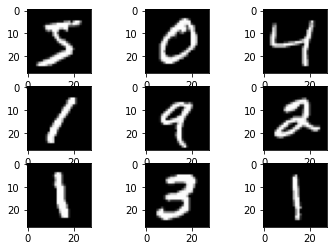

In [17]:
# example of loading the mnist dataset
from keras.datasets import mnist
from matplotlib import pyplot
# from keras.utils import to_categorical
import tensorflow as tf
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [18]:
# record model performance on a validation dataset during training
# history = model.fit(..., validation_data=(valX, valY))

In [19]:
# # example of k-fold cv for a neural net
# data = trainX
# # prepare cross validation
# kfold = KFold(5, shuffle=True, random_state=1)
# # enumerate splits
# for train_ix, test_ix in kfold.split(data):
#         model = ...

In [20]:
# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [21]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = tf.keras.utils.to_categorical(trainY)
	testY = tf.keras.utils.to_categorical(testY)
	return trainX, trainY, testX, testY

In [22]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [23]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  # model.add(Dense(50, activation='relu'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [31]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=2) #plan to change the different hyperparameter soon!
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

In [25]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(2, 1, 1)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(2, 1, 2)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	pyplot.show()

In [26]:
# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()

In [27]:
from sklearn.model_selection import KFold 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D


In [35]:
from numpy import mean
from numpy import std

Epoch 1/10
1500/1500 - 25s - loss: 0.1810 - accuracy: 0.9446 - val_loss: 0.0802 - val_accuracy: 0.9766
Epoch 2/10
1500/1500 - 24s - loss: 0.0588 - accuracy: 0.9825 - val_loss: 0.0630 - val_accuracy: 0.9810
Epoch 3/10
1500/1500 - 24s - loss: 0.0377 - accuracy: 0.9886 - val_loss: 0.0721 - val_accuracy: 0.9775
Epoch 4/10
1500/1500 - 24s - loss: 0.0242 - accuracy: 0.9931 - val_loss: 0.0571 - val_accuracy: 0.9847
Epoch 5/10
1500/1500 - 24s - loss: 0.0175 - accuracy: 0.9945 - val_loss: 0.0559 - val_accuracy: 0.9831
Epoch 6/10
1500/1500 - 24s - loss: 0.0109 - accuracy: 0.9971 - val_loss: 0.0595 - val_accuracy: 0.9834
Epoch 7/10
1500/1500 - 24s - loss: 0.0080 - accuracy: 0.9978 - val_loss: 0.0566 - val_accuracy: 0.9851
Epoch 8/10
1500/1500 - 24s - loss: 0.0049 - accuracy: 0.9989 - val_loss: 0.0552 - val_accuracy: 0.9850
Epoch 9/10
1500/1500 - 24s - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0542 - val_accuracy: 0.9853
Epoch 10/10
1500/1500 - 24s - loss: 0.0019 - accuracy: 0.9999 - val_loss:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


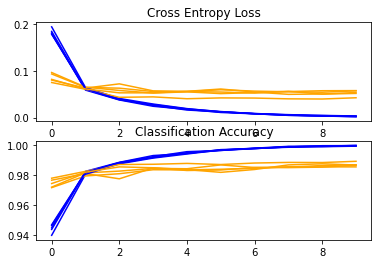

Accuracy: mean=98.700 std=0.123, n=5


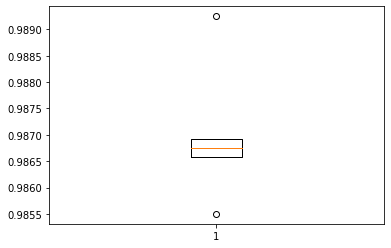

In [32]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)
 
# entry point, run the test harness
run_test_harness()